In [5]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


# create artifitial dataset
n_samples = 50
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


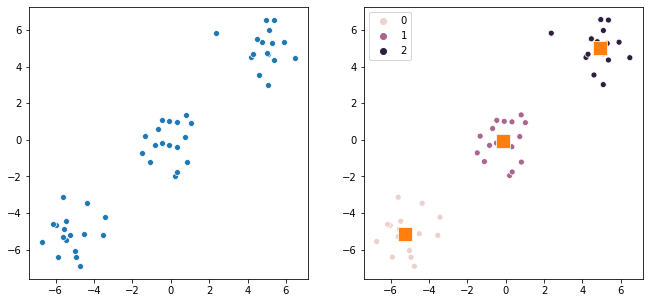

In [6]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [20]:
import pandas as pd

table = pd.read_csv('ClassifiedTable.txt', sep='\t', header=(0), index_col=0)

clust11 = table[table.loc[:, 'Prediction'] == 11]
clust10 = table[table.loc[:, 'Prediction'] == 10]
clust5 = table[table.loc[:, 'Prediction'] == 5]

targets = table[(table.loc[:, 'Prediction'] == 11) |
                (table.loc[:, 'Prediction'] == 10) |
                (table.loc[:, 'Prediction'] == 5)]

cluster_data = targets.iloc[:, 0:-1]

In [22]:
# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(cluster_data)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

In [27]:
print(fcm_centers)
print(fcm_labels)

   Roetzer log2  Lelandais log2 Rep1  Lelandais log2 Rep2  Kuo log2 Rep1  \
0      0.891076             1.162550             1.383791       2.083122   
1      0.322969             0.611260             0.524314       1.635419   
2     -0.017120            -0.086516             0.036069       2.260892   

   Kuo log2 Rep2  Kuo log2 Rep3  Lelandais log2 Chip-Seq Rep1  \
0       1.779376       1.489851                      3.488234   
1       1.457784       0.924088                      2.390689   
2       2.462272       0.982137                      0.576607   

   Lelandais log2 Chip-Seq Rep2  
0                      5.062185  
1                      3.690726  
2                      0.730754  
[2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 0 2 0 1 2 2 2 2
 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 1
 1 2 0 0 1 0 2 2 2 1 2 2 1 0 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 0 2 2 2 0 1 2 2 2 2 2 1 1 2 2 2 2 0 1 0 0 0 0 2 2 0 0 2 2 2 2 1 2 

In [34]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 2)
pca_result = pca.fit_transform(cluster_data.values)
pca_cluster_result = pca.fit_transform(fcm_centers.values)

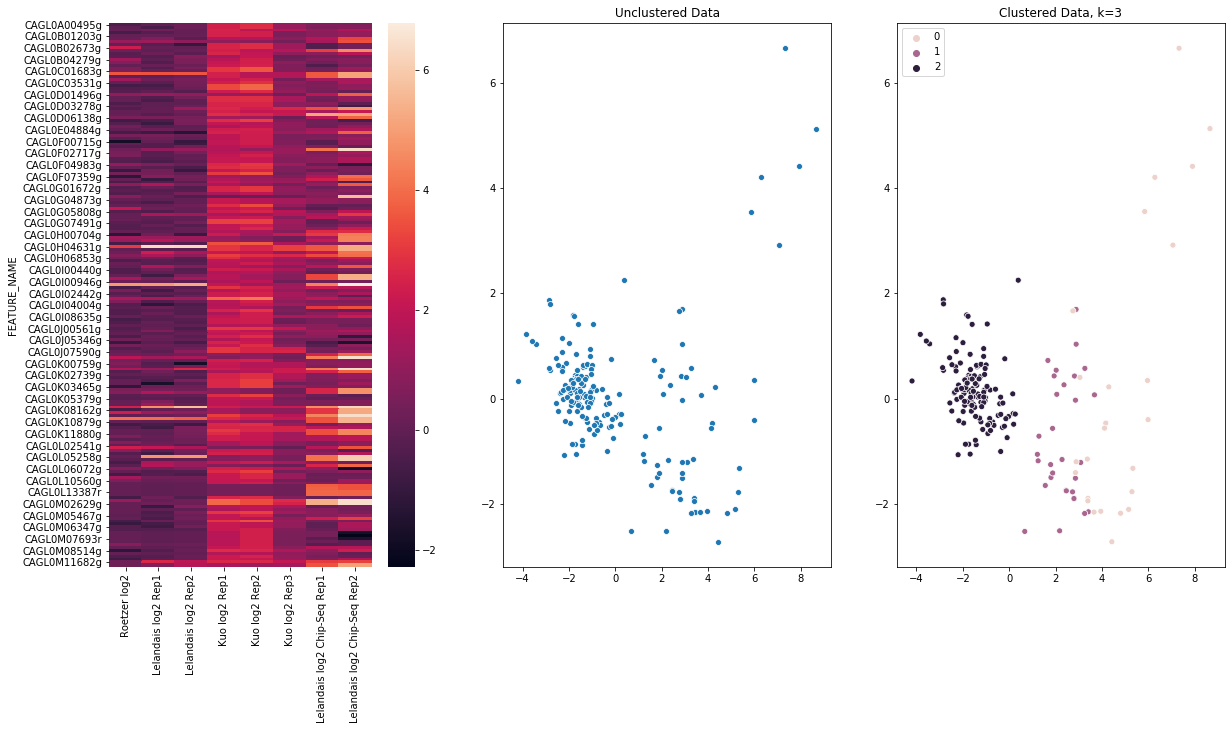

In [54]:
import seaborn as sns
xVal = np.array(pca_result[:, 0])
yVal = np.array(pca_result[:, 1])


%matplotlib inline
f, axes = plt.subplots(1, 3, figsize=(20,10))
scatter(xVal, yVal, ax=axes[1])
scatter(xVal, yVal, ax=axes[2], hue=fcm_labels)
sns.heatmap(targets.iloc[:,0:-1], ax=axes[0])
axes[1].set_title('Unclustered Data')
axes[2].set_title('Clustered Data, k=3')
# scatter(pca_cluster_result[:,0], pca_cluster_result[:,1], ax=axes[1],marker="s")
plt.show()